## ASAS-SN SkyPatrol Python API Demo

The pyasassn client allows users to query the ASAS-SN input catalog and retrieve light curves from our database. These light curves are subject to live updates as we are running continuous photometry on our nightly images.



### Installation

Make sure your pip points to the appropriate Python >= 3.6 installation...
<pre><code>
    git clone https://github.com/asas-sn/skypatrol.git
    pip3 install skypatrol/ 
</code></pre>

### Tutorial

Create a SkyPatrolClient object. The client will automatically ping the server for the most recent catalog data.

In [1]:
from pyasassn.client import SkyPatrolClient

client = SkyPatrolClient("bad_client", "a5a55N_CLIENT")
client.catalogs


Table Name: stellar_main
Num Columns: 47
Num Targets: 98932961

Table Name: master_list
Num Columns: 4
Num Targets: 103874668

Table Name: comets
Num Columns: 1
Num Targets: 1825

Table Name: swift
Num Columns: 56
Num Targets: 254936

Table Name: allwiseagn
Num Columns: 15
Num Targets: 1354900

Table Name: mdwarf
Num Columns: 32
Num Targets: 8927

Table Name: milliquas
Num Columns: 21
Num Targets: 1979676

Table Name: fermi
Num Columns: 67
Num Targets: 5788

Table Name: aavsovsx
Num Columns: 28
Num Targets: 1437528

Table Name: morx
Num Columns: 38
Num Targets: 1121954

Table Name: chandra
Num Columns: 516
Num Targets: 317224

Table Name: asteroids
Num Columns: 1
Num Targets: 131103


#### Main Catalog

The __stellar_main__ catalog contains the bulk of our targets. It was built off of ATLAS REFCAT2 and contains GAIA, TESS, SDSS, and ALLWISE identifiers where available.

In [2]:
client.catalogs.stellar_main.head(12)

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,refcat_id,bigint
4,gaia_id,bigint
5,hip_id,string
6,tyc_id,string
7,tmass_id,string
8,sdss_id,string
9,allwise_id,string


#### HEASARC Catalogs

The remaining catalogs were sourced from NASA's HEASARC archive. Each of these retains its original columnar data, though we have appended an __asas_sn_id__ for all of them.

In [3]:
client.catalogs.aavsovsx.head(12)

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,source_number,bigint
4,name,string
5,variability_flag,bigint
6,lii,double
7,bii,double
8,variability_type,string
9,max_mag_type,double


#### The Master List

The __master_list__ contains __asas_sn_ids__ coordinates and catalog sources for all of our targets. All of our catalogs are cross-matched on the master list with a 2-arcsecond cone. 

In [4]:
client.catalogs.master_list

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,catalog_sources,array<string>


### Cone Seach

Lets run a simple cone-search on the master list. 

In [4]:
client.cone_search(ra_deg=270, dec_deg=88, radius=4, catalog='master_list')

,asas_sn_id,ra_deg,dec_deg,catalog_sources
0,8590494153,270.508480,84.120395,"[stellar_main, tic]"
1,8590493551,257.333476,84.119978,"[stellar_main, tic]"
2,8590494160,273.628334,84.120183,"[stellar_main, tic]"
3,8590494620,282.208531,84.120019,"[stellar_main, tic]"
4,8590493763,257.575614,84.119906,"[stellar_main, tic]"
...,...,...,...,...
82247,317828630672,272.518828,89.284092,"[stellar_main, tic]"
82248,317828630205,0.339976,89.284143,"[stellar_main, tic]"
82249,317828630428,142.968424,89.283984,"[stellar_main, tic]"
82250,317828630825,353.474920,89.284470,"[stellar_main, tic]"


### Random Curves 

For whatever reason, if you are interested in random targets from a given catalog, we can give you those too.

In [4]:
client.random_sample(1000, catalog="aavsovsx")

,asas_sn_id,ra_deg,dec_deg,name
0,1113018,153.71021,-87.60661,CSTAR 008426
1,661427528921,202.20258,-86.44966,ASAS J132849-8627.0
2,17181203627,178.97920,-86.41933,ASASSN-V J115555.01-862509.6
3,1174090,92.42367,-85.68897,ASAS J060942-8541.4
4,1091602,185.35727,-85.54910,ASASSN-V J122125.74-853256.8
...,...,...,...,...
995,420907288276,274.46399,-39.29107,ASASSN-V J181751.36-391727.9
996,481036797148,149.27494,-39.29067,BN Ant
997,661427734741,253.51363,-39.06049,GDS_J1654032-390337
998,558346447327,254.30529,-39.06047,V0585 Sco


### Query Lists

If you have a list of external identifiers you can query our catalogs using these. 
For the __stellar_main__ catalog, use the __id_col__ parameter.
For other catalogs you can search by name.

In [5]:
my_tic_ids = [6658326, 46783395, 1021890]
client.query_list(my_tic_ids, catalog='stellar_main', id_col='tic_id')

,asas_sn_id,ra_deg,dec_deg,tic_id
0,309238124040,329.260377,-8.035864,1021890
1,335007699083,97.045759,18.214838,46783395
2,335007693701,81.164422,18.222147,6658326


In [6]:
my_vso_id = 'ASASSN-V J182608.32-864925.1'
client.query_list(my_vso_id, catalog='aavsovsx', id_col='name')

,asas_sn_id,ra_deg,dec_deg,name
0,17181129184,276.53493,-86.82375,ASASSN-V J182608.32-864925.1


### ADQL Queries

We have inculded a custom ADQL parser. That will allow users to query targets using this familiar SQL-like language. 
First, take note how we can use this to perform a cone-search.


In [10]:
query = """
SELECT 
 * 
FROM stellar_main 
WHERE DISTANCE(ra_deg, dec_deg, 270, 88) <= ARCMIN(7.1)
"""
client.adql_query(query)

,asas_sn_id,ra_deg,dec_deg,refcat_id,gaia_id,hip_id,tyc_id,tmass_id,sdss_id,allwise_id,...,pstarrs_r_mag_contrib,pstarrs_i_mag,pstarrs_i_mag_d,pstarrs_i_mag_chi,pstarrs_i_mag_contrib,pstarrs_z_mag,pstarrs_z_mag_d,pstarrs_z_mag_chi,pstarrs_z_mag_contrib,nstat
0,8590499342,266.760769,87.994154,213592667607683838,1728180804235224448,None,None,None,None,None,...,21,15.881000,0.011,1.84,21,15.802000,0.011,0.02,5,0
1,317828596975,269.865452,88.066775,213682698654510985,1728181491429914880,None,None,None,None,None,...,5,17.815001,0.011,0.18,5,17.771999,0.012,0.05,5,0
2,317828589462,269.677367,88.056602,213662696773678777,1728181491429914240,None,None,None,None,None,...,23,14.768000,0.009,0.28,23,14.660000,0.009,0.12,7,0
3,317828578914,267.796802,88.027542,213632677968013904,1728181010393572736,None,None,None,None,None,...,23,15.664000,0.009,4.65,23,15.583000,0.009,0.04,7,0
4,317828643144,269.544358,87.885949,213462695443583992,1728163967963342336,None,None,None,None,None,...,23,14.770000,0.008,0.06,23,14.736000,0.008,0.08,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,317828585831,268.773057,88.043282,213652687730562793,1728181422710436608,None,None,None,None,None,...,5,16.090000,0.010,0.09,5,16.033001,0.011,0.03,5,0
80,8590481418,270.792135,87.964613,213552707921348389,2305235980012128896,None,None,None,None,None,...,17,15.279000,0.032,0.00,17,15.243000,0.100,0.00,1,0
81,317828603270,269.620495,88.089628,213702696204958408,1728184583806368128,None,None,None,None,None,...,5,15.850000,0.010,0.13,5,15.779000,0.011,0.08,5,0
82,8590486106,269.331190,87.973159,213562693311908645,1728168331650117632,None,None,None,None,None,...,17,13.438000,0.020,0.48,17,13.071000,0.100,0.00,1,0


##### JOINS
Since we have cross matched all of our catalogs. We can use ADQL to explore targets accross catalogs.

In [11]:
query = """
SELECT 
 asas_sn_id,
 chandra.name AS c_name,
 fermi.name 
FROM chandra 
JOIN fermi USING(asas_sn_id) 
"""
client.adql_query(query)

,asas_sn_id,c_name,name
0,661430449133,2CXO J111506.1-611831,4FGL J1115.1-6118
1,661430429038,2CXO J170112.5-300622,4FGL J1701.2-3006
2,661430406107,2CXO J134117.0+395824,4FGL J1341.2+3958
3,661430407082,2CXO J123051.0+122316,4FGL J1230.8+1223
4,661430339024,2CXO J115324.2+493101,4FGL J1153.4+4931


#### Complex Searches

Lets say we were searching for white dwarfs that crossmatched in the VSO catalog.

In [12]:
query = """
SELECT 
  asas_sn_id,
  gaia_id,
  pstarrs_g_mag,
  (gaia_mag - (5 * LOG10(plx) - 10)) AS g_mag_abs, 
  name 
FROM stellar_main 
JOIN aavsovsx USING(asas_sn_id)
WHERE 1=1
 AND pstarrs_g_mag < 14 
 AND (gaia_mag - (5 * LOG10(plx) - 10)) > 10
 AND (gaia_b_mag - gaia_r_mag) < 1.5 
"""
client.adql_query(query)

,asas_sn_id,gaia_id,pstarrs_g_mag,g_mag_abs,name
0,181372,6365299282529638144,13.098,21.352232,ASASSN-V J184600.51-775012.2
1,186349,5203267018416511744,13.465,23.143382,ASASSN-V J092316.53-772438.7
2,263837,6361439962354721792,13.695,22.938590,WISE J195938.6-800855
3,332165,5224188216434490880,10.871,15.089097,DW Cha
4,486976,5769946583998399744,13.048,20.846457,ASASSN-V J143328.31-833751.6
...,...,...,...,...,...
86597,652835634288,5487719953651312896,12.795,22.050073,ASASSN-V J073832.21-564042.5
86598,652835635323,6493005015473037952,7.182,11.311868,HD 219301
86599,652835648753,5341965840440006144,9.583,19.661999,HD 103245
86600,652835832497,6653097030917575424,13.586,23.818609,WISE J181004.2-544507


#### Downloading Curves

Any of the previous functions can take __mode='download_curves'__ as a parameter to download the lightcurves coresponding to these targets. 

The client will return a LightCurveCollection object which can be used for further analysis and plotting.

In [15]:
# Should take about 2-4 minutes
lcs = client.adql_query(query, download=True, threads=8)
lcs.data

,jd,flux,flux_err,mag,mag_err,limit,fwhm,cam,asas_sn_id
0,2.458645e+06,78.410028,0.052278,11.664137,0.000725,17.856844,2.04,bA,77310765200
1,2.458734e+06,77.664131,0.060136,11.674514,0.000842,17.704813,2.35,bA,77310765200
2,2.458581e+06,77.775874,0.031520,11.672953,0.000441,18.406184,2.00,bA,77310765200
3,2.458632e+06,78.373122,0.033561,11.664648,0.000465,18.338047,2.05,bA,77310765200
4,2.458660e+06,77.915809,0.018942,11.671002,0.000264,18.959095,2.38,bA,77310765200
...,...,...,...,...,...,...,...,...,...
250,2.458785e+06,139.022185,0.173497,11.042355,0.001357,16.554408,1.48,bt,506806182532
251,2.458290e+06,164.381047,0.216577,10.860436,0.001432,16.313608,1.49,bt,506806182532
252,2.458390e+06,140.143750,0.174757,11.033631,0.001355,16.546555,1.58,bt,506806182532
253,2.458568e+06,139.016365,0.143879,11.042401,0.001125,16.757647,1.42,bH,506806182532


In [16]:
lcs.stats()

,mean_mag,std_mag,epochs
asas_sn_id,,,
6722,13.711917,0.142505,1037
7205,9.365142,0.419704,452
10138,11.979593,0.032141,836
12702,13.081345,0.167359,1065
15055,12.442061,0.331931,466
...,...,...,...
661425547786,13.498152,0.111233,227
661425547969,13.068908,0.274919,116
661425548441,13.692043,0.130791,260


#### Individual Curves

We can pull the individual curve from the LightCurveCollection object and plot.
Utilities are also available for lomb_scargle and period calculation.

In [17]:
lightcurve = lcs[12702]
lightcurve.meta

,asas_sn_id,gaia_id,pstarrs_g_mag,g_mag_abs,name
16568,12702,5211052415435948544,13.135,20.653901,VX Men


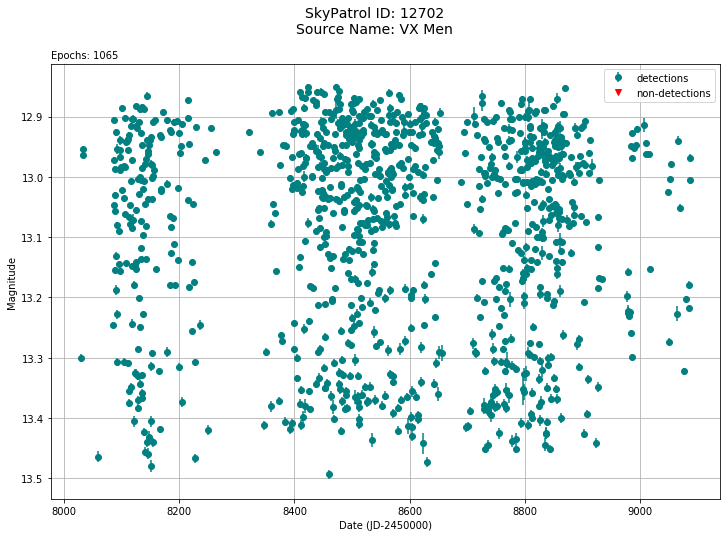

In [18]:
lightcurve.plot()

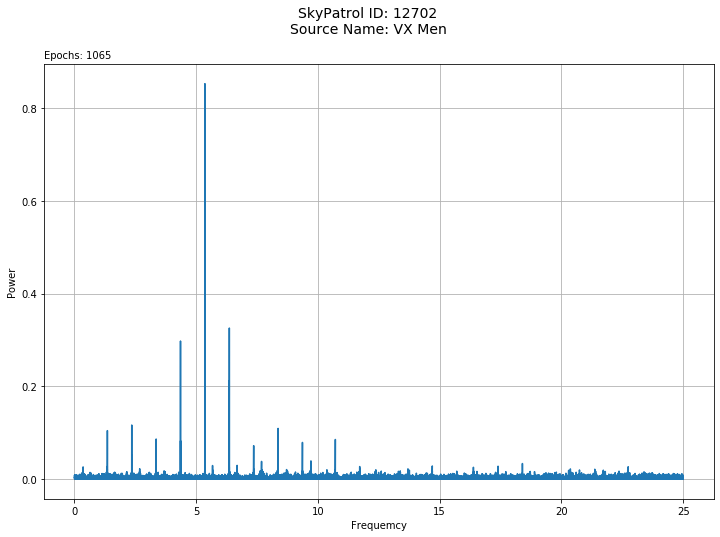

In [19]:
frequency, power, ls = lightcurve.lomb_scargle(plot=True)

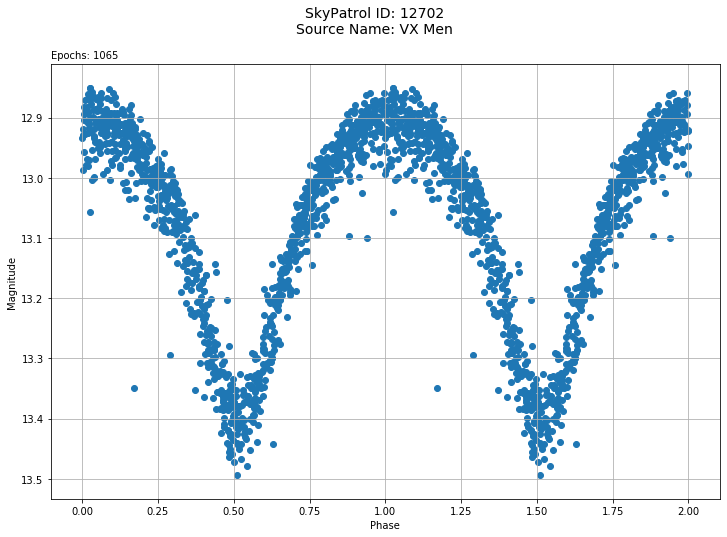

0.186687877997617

In [20]:
lightcurve.find_period(frequency, power, plot=True)

#### Saving

Finally, we can save the individual light curve or the entire collection to .csv

In [23]:
# Individual
lightcurve.save(path="vxmen.csv")
# Collection
lcs.save(save_dir="tmp/")